# Задание 1: визуализация деревьев 

Дерево задаётся как ориентированный граф, все рёбра которого ориентированы от корня к листьям. 
Нужно реализовать укладку с помощью HV-подхода или алгоритма Layered-Tree-Draw. 
Можно выбрать и другой алгоритм, но требуется указать описание или ссылку на описание при сдаче проекта. 

### Устновка библиотек

In [18]:
!pip install networkx

In [19]:
!pip install requests

In [20]:
!pip install matplotlib

In [21]:
from pprint import pprint

import networkx as nx
import matplotlib.pyplot as plt

### Создаем класс для визуализации бинарных деревьев

In [22]:
class HVTree:
    def __init__(self, filename):
        self.positions = {}
        self.tree = nx.read_graphml(filename)

        self.tree_dict = {}
        for node in self.tree.nodes:
            self.tree_dict[node] = list(self.tree.neighbors(node))
    
    def hv_tree(self, root, depth, width):
        self.positions[root] = (width, depth)
        children = self.tree_dict[root]
        if len(children) == 0:
            return 0
        elif len(children) == 1:
            return self.hv_tree(children[0], depth, width+1)
        else:
            depth_right = self.hv_tree(children[0], depth, width+1)
            depth_down = self.hv_tree(children[1], depth+depth_right-1, width)
            return depth_right + depth_down - 1
    
    def show_tree_dict(self):
        pprint(self.tree_dict)
        
    def draw(self):
        self.hv_tree(list(self.tree.nodes)[0], 0, 0)
        
        plt.figure(figsize=(25, 40))
        nx.draw(self.tree, self.positions, with_labels=True, arrowsize=50, node_size=1000, node_color = '#ff0')

### Загружаем файлы

In [28]:
!git clone https://github.com/SergeyMalyshevsky/FilesForDataVisualization.git

Cloning into 'FilesForDataVisualization'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 3), reused 6 (delta 3), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [31]:
!ls

FilesForDataVisualization tree-skewed.xml           tree420-02.xml
data                      tree1.xml                 tree49-05.xml
homework_1.ipynb          tree252.xml               tree659-02.xml


### Создаем экземпляр класса 

In [33]:
hv_tree = HVTree("FilesForDataVisualization/tree-84n.xml")

### Выводим дерево в виде словаря

In [34]:
hv_tree.show_tree_dict()

{'n0': ['n1', 'n2'],
 'n1': [],
 'n10': ['n11'],
 'n11': ['n12'],
 'n12': [],
 'n13': ['n14', 'n22'],
 'n14': ['n15', 'n20'],
 'n15': ['n16'],
 'n16': ['n17'],
 'n17': ['n18'],
 'n18': ['n19'],
 'n19': [],
 'n2': ['n3', 'n80'],
 'n20': ['n21'],
 'n21': [],
 'n22': ['n23', 'n28'],
 'n23': ['n24', 'n26'],
 'n24': ['n25'],
 'n25': [],
 'n26': ['n27'],
 'n27': [],
 'n28': [],
 'n29': [],
 'n3': ['n4', 'n34'],
 'n30': ['n31', 'n32'],
 'n31': [],
 'n32': ['n33'],
 'n33': [],
 'n34': ['n35', 'n40'],
 'n35': ['n36', 'n38'],
 'n36': ['n37'],
 'n37': [],
 'n38': ['n39'],
 'n39': [],
 'n4': ['n5', 'n30'],
 'n40': ['n41', 'n44'],
 'n41': ['n42'],
 'n42': ['n43'],
 'n43': [],
 'n44': ['n45', 'n68'],
 'n45': ['n46', 'n54'],
 'n46': ['n47', 'n52'],
 'n47': ['n48', 'n50'],
 'n48': ['n49'],
 'n49': [],
 'n5': ['n6', 'n29'],
 'n50': ['n51'],
 'n51': [],
 'n52': ['n53'],
 'n53': [],
 'n54': ['n55', 'n65'],
 'n55': ['n56', 'n64'],
 'n56': ['n57'],
 'n57': ['n58', 'n59'],
 'n58': [],
 'n59': ['n60'],
 'n6'

### Рисуем дерево

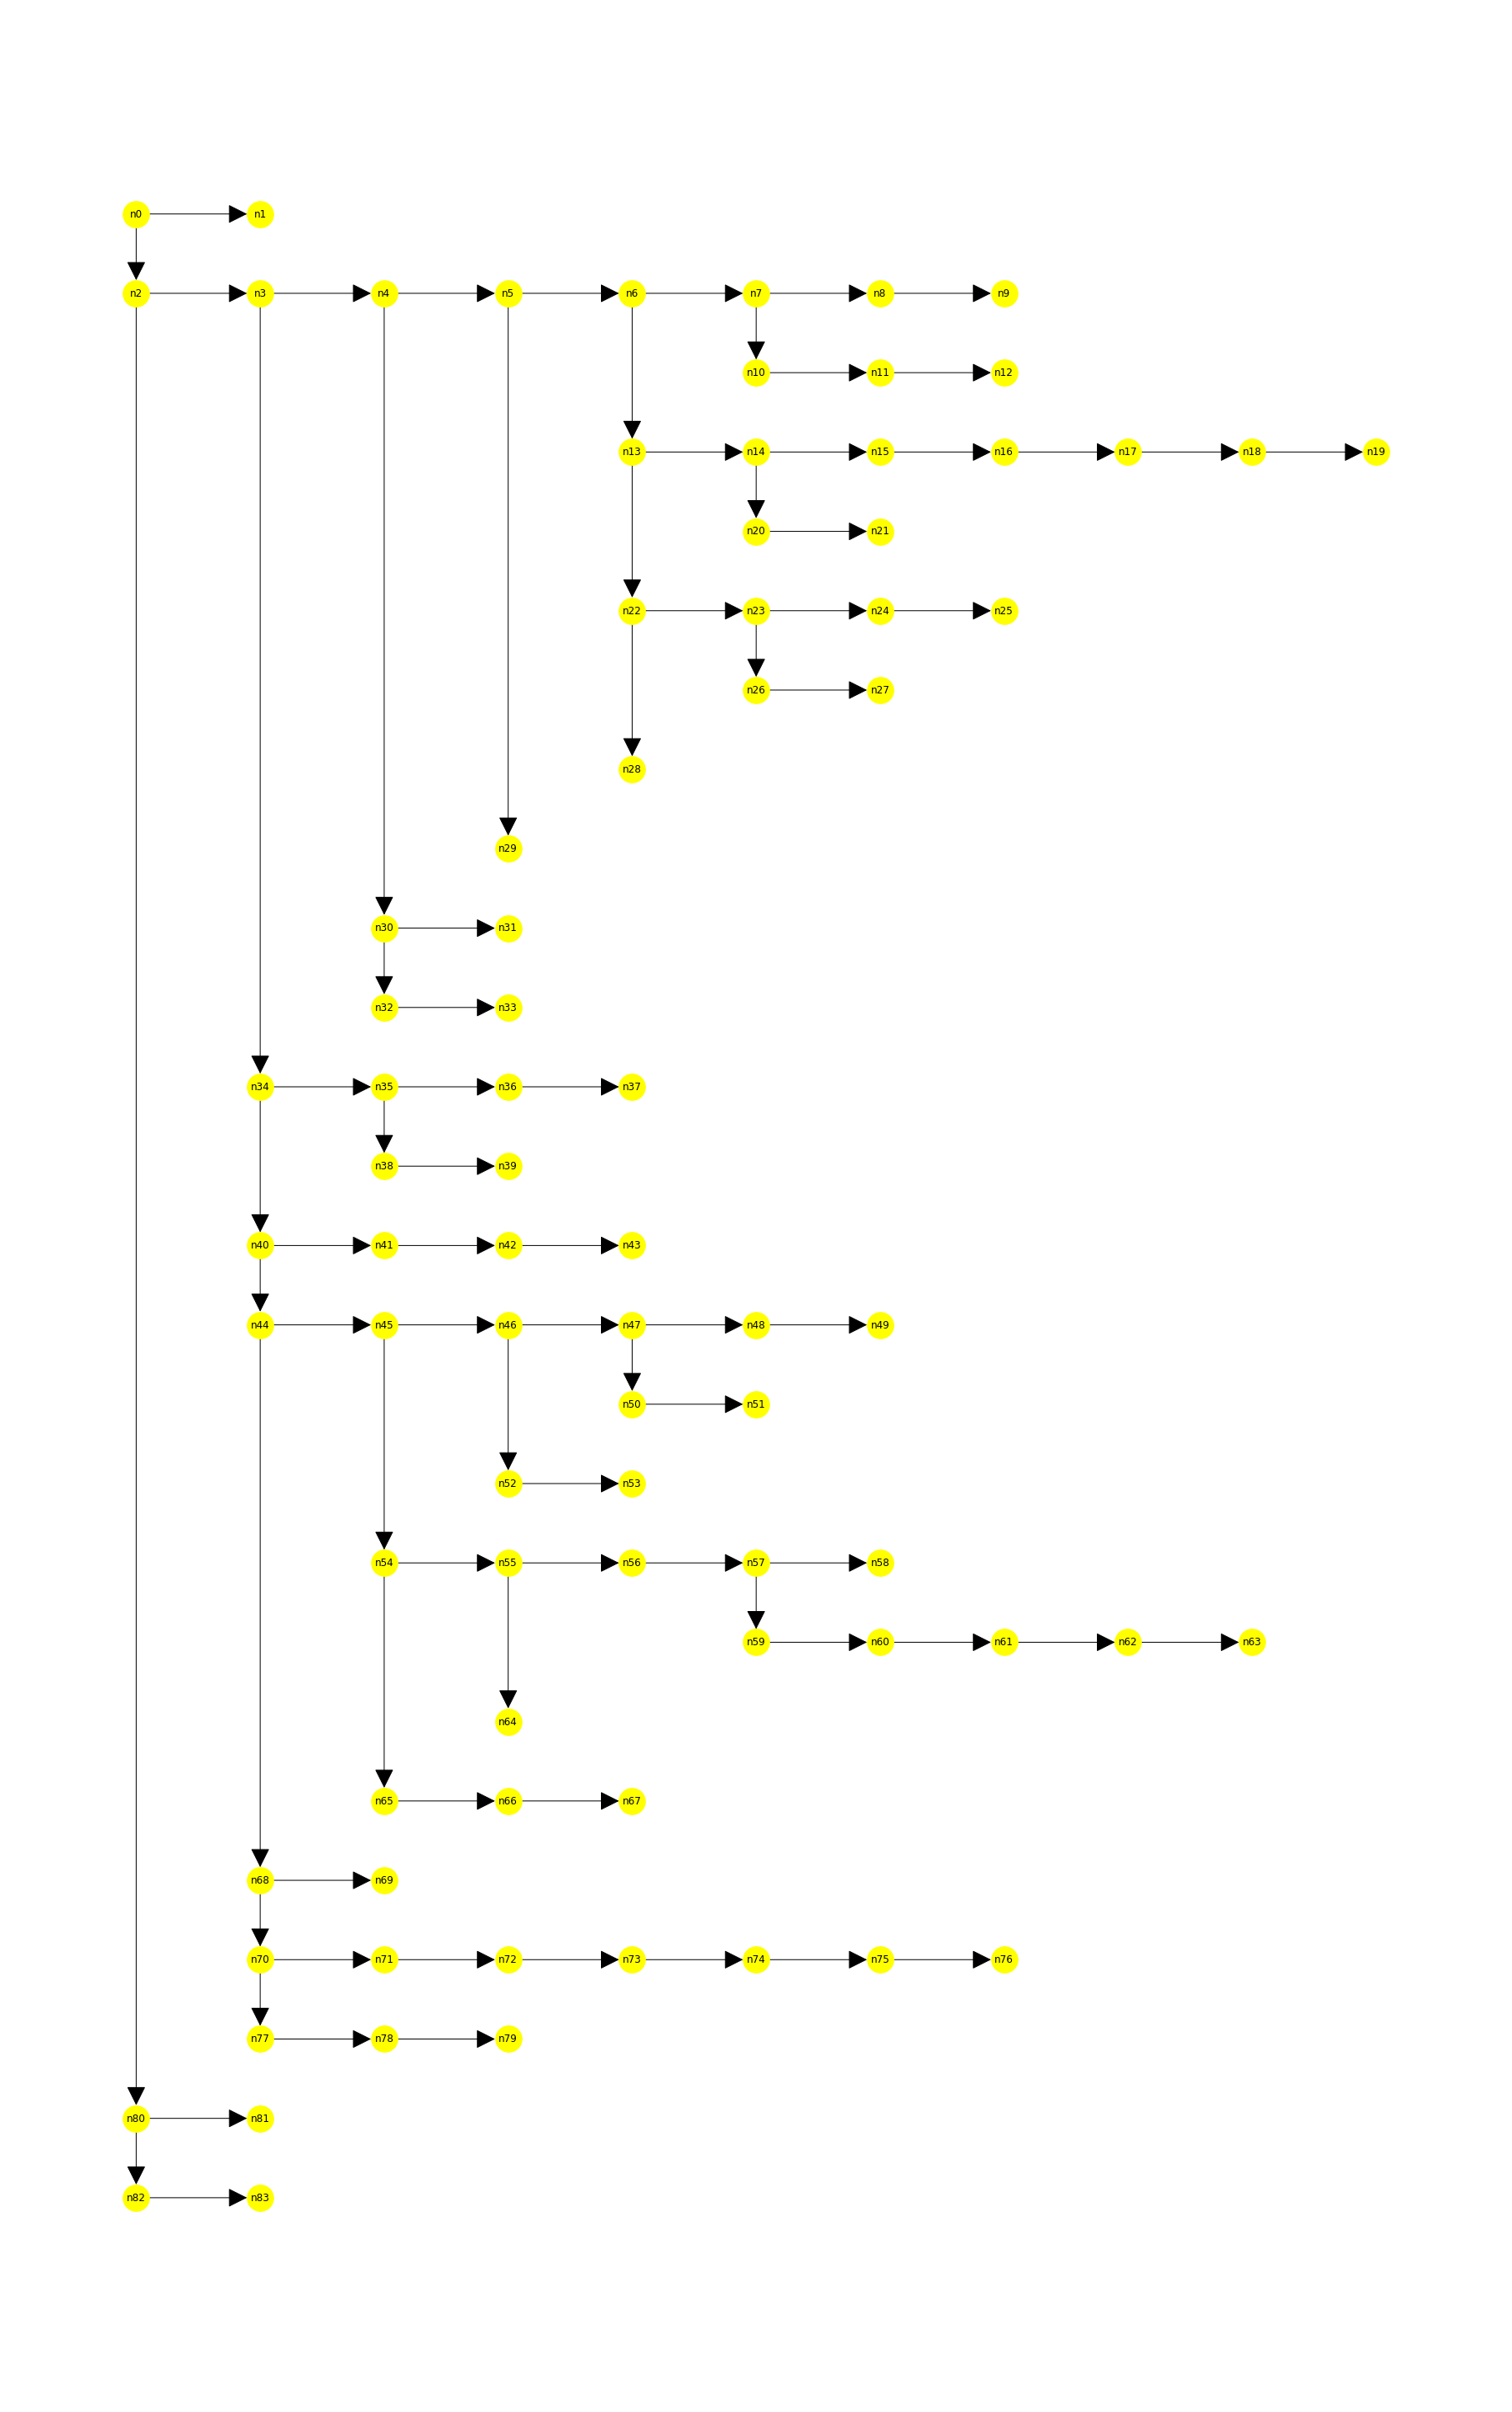

In [35]:
hv_tree.draw()